In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import DistanceLib
import TreeLib
import ClusterLib

In [5]:
np.random.seed(42)

trees = ClusterLib.trees

n_range = range(1, 10)
wss = []
results = []
for i in n_range:
    print('\n%d cluster: ' % i)
    chosen_trees, centers, converged = ClusterLib.tree_kmeans(i)
    results.append([chosen_trees, centers, converged])
    wss.append(calculate_wss(i, chosen_trees, centers))


1 cluster: 
0    88
Name: cluster, dtype: int64
iter 0, disagreement 45
0    88
Name: cluster, dtype: int64
iter 1, disagreement 0

2 cluster: 
0    51
1    37
Name: cluster, dtype: int64
iter 0, disagreement 43
0    59
1    29
Name: cluster, dtype: int64
iter 1, disagreement 1

3 cluster: 
2    32
1    28
0    28
Name: cluster, dtype: int64
iter 0, disagreement 43
2    48
0    21
1    19
Name: cluster, dtype: int64
iter 1, disagreement 0

4 cluster: 
3    26
1    24
2    20
0    18
Name: cluster, dtype: int64
iter 0, disagreement 45
3    42
0    18
1    16
2    12
Name: cluster, dtype: int64
iter 1, disagreement 1

5 cluster: 
0    20
4    18
3    18
2    18
1    14
Name: cluster, dtype: int64
iter 0, disagreement 48
1    39
4    14
2    14
0    12
3     9
Name: cluster, dtype: int64
iter 1, disagreement 0

6 cluster: 
3    20
4    19
0    15
5    12
2    11
1    11
Name: cluster, dtype: int64
iter 0, disagreement 42
1    39
4    13
3    12
0    10
5     7
2     7
Name: cluster, dtyp

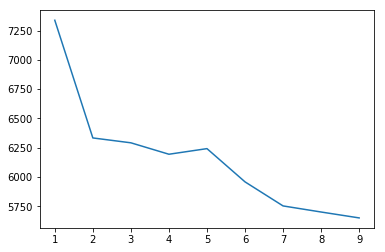

In [7]:
# plot wss vs. # of clusters
# choose the elbow as the "optimal" # of trees
plt.plot(n_range, wss)

In [12]:
num_cluster = 3
chosen_trees = results[num_cluster-1][0]

trees_to_visualize = []
for i in range(num_cluster):
    chosen_trees_this_cluster = chosen_trees[chosen_trees.cluster == i].copy()
    trees_to_visualize.append(chosen_trees_this_cluster.sample(n=min(5, chosen_trees_this_cluster.shape[0])))

for df in trees_to_visualize:
    for index, row in df.iterrows():
        TreeLib.save_Tree(trees[row.patient][row.good_tree], 'consistent') 
        TreeLib.save_Tree(trees[row.patient][np.random.randint(len(trees[row.patient]))], 'random')
        os.system('dot -Tpdf output/%s_consistent.dot -o output/consistent/cluster%d_%s_consistent.pdf' % (row.patient, row.cluster, row.patient))
        os.system('dot -Tpdf output/%s_random.dot -o output/random/cluster%d_%s_random.pdf' % (row.patient, row.cluster, row.patient))

In [8]:
import gene_dict

In [ ]:
gene_dict

In [4]:
def calculate_wss(n, chosen_trees, centers):
    wss = 0
    for k in range(n):
        cluster_k_rows = chosen_trees[chosen_trees.cluster==k]
        cluster_k_trees = cluster_k_rows.apply(lambda x: trees[x.patient][x.good_tree], axis=1)
        center = centers[k]
        # cluster_k_distances[i] = distance between tree i and center
        cluster_k_distances = [DistanceLib.distance_profile(x, center) for x in cluster_k_trees]      
        wss += sum(cluster_k_distances)
    return wss